In [60]:
# Step 1: Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pathlib import Path

# Display settings
plt.rcParams['figure.figsize'] = (8, 5)
pd.set_option('display.max_columns', 100)


In [61]:
# Step 2: Load Dataset
DATA_PATH = Path("marketing_data.csv")  
 
df = pd.read_csv(DATA_PATH)

# date column parse
if 'Dt_Customer' in df.columns:
    df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce', dayfirst=True)

# Preview
df.head()



/var/folders/wp/st_3pm_115z2t4w9mpgwv3r00000gn/T/ipykernel_1542/3489550821.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce', dayfirst=True)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,2014-11-05,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,2014-08-04,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [62]:
# Step 3: Basic Info & Missing Values

# Dataset size
print("Shape:", df.shape)

# Missing values check
print("\nMissing Values:")
print(df.isna().sum().sort_values(ascending=False).head(10))

# Data types
print("\nData Types:")
print(df.dtypes)

# Preview again
df.head()


Shape: (2240, 28)

Missing Values:
 Income              24
ID                    0
NumDealsPurchases     0
Complain              0
Response              0
AcceptedCmp2          0
AcceptedCmp1          0
AcceptedCmp5          0
AcceptedCmp4          0
AcceptedCmp3          0
dtype: int64

Data Types:
ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
 Income                        object
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchas

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,2014-11-05,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,2014-08-04,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [63]:
# Step 4: Clean Education and Marital_Status

# Education clean
df['Education'] = df['Education'].replace({
    '2n Cycle': 'Secondary',
    'Basic': 'Basic',
    'Graduation': 'Graduation',
    'Master': 'Master',
    'PhD': 'PhD'
}).str.strip().str.title()

# Marital_Status clean
df['Marital_Status'] = df['Marital_Status'].replace({
    'Alone': 'Single',
    'Absurd': 'Single',
    'YOLO': 'Single',
    'Yolo': 'Single',
    'Together': 'Married',
    'Widow': 'Widow',
    'Widower': 'Widow'
}).str.strip().str.title()

# Check unique values after cleaning
print("Education:", df['Education'].unique())
print("Marital_Status:", df['Marital_Status'].unique())


Education: ['Graduation' 'Phd' 'Secondary' 'Master' 'Basic']
Marital_Status: ['Divorced' 'Single' 'Married' 'Widow']


In [64]:
# Step 5: Convert Income to numeric and fill missing values

# Remove extra spaces in column names
df.columns = df.columns.str.strip()

# Convert Income to numeric (remove currency symbols and commas)
df['Income'] = pd.to_numeric(df['Income'].astype(str).str.replace(r'[^0-9.]', '', regex=True), errors='coerce')

# Fill missing values with median based on Education and Marital_Status groups
df['Income'] = df['Income'].fillna(
    df.groupby(['Education', 'Marital_Status'])['Income'].transform('median')
)

# Fill any remaining missing values with overall median
df['Income'] = df['Income'].fillna(df['Income'].median())

# Check result
print("Missing Income:", df['Income'].isna().sum())




Missing Income: 0


In [65]:
list(df.columns)

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response',
 'Complain',
 'Country']

In [66]:
# Step 6: Create new features

# Total children at home
df['Children'] = df['Kidhome'] + df['Teenhome']

# Age of customer
from datetime import datetime
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']

# Total amount spent across all product categories
mnt_cols = [c for c in df.columns if c.startswith('Mnt')]
df['TotalSpending'] = df[mnt_cols].sum(axis=1)

# Total number of purchases across channels
df['TotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

# Preview the new columns
df[['Children', 'Age', 'TotalSpending', 'TotalPurchases']].head()


,Children,Age,TotalSpending,TotalPurchases
0,0,55,1190,14
1,0,64,577,17
2,1,67,251,10
3,2,58,11,3
4,1,36,91,6


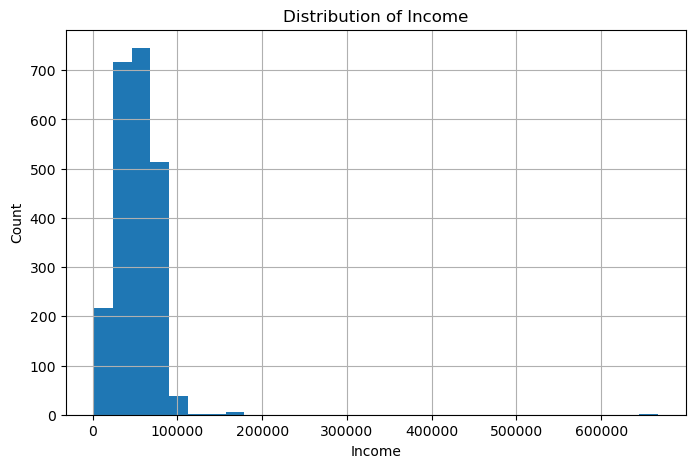

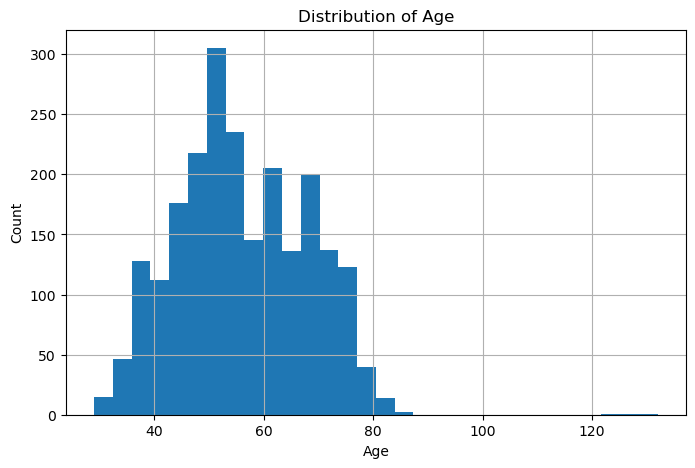

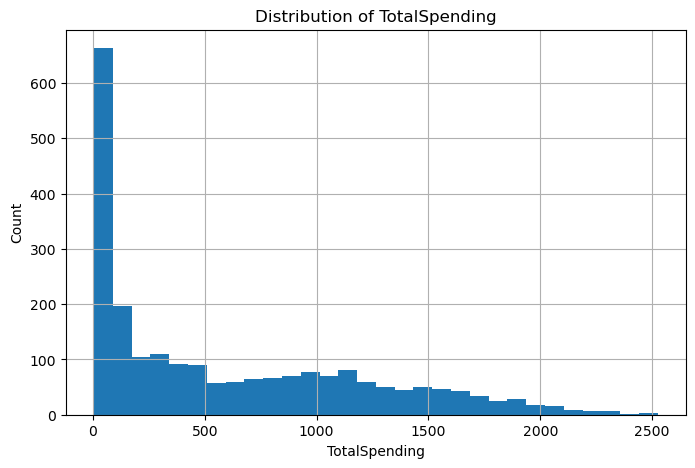

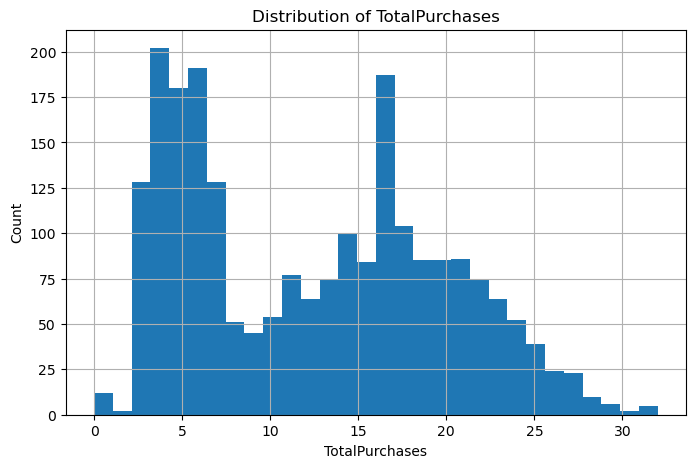

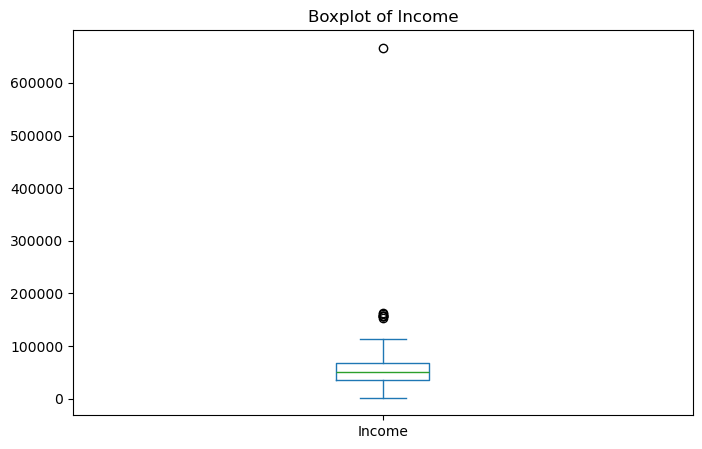

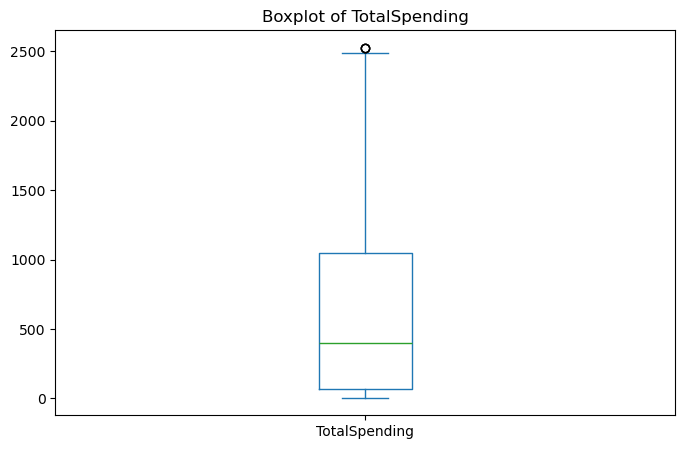

In [67]:
# Step 7: Plot distributions to see data spread

# Histograms for key numeric columns
for col in ['Income', 'Age', 'TotalSpending', 'TotalPurchases']:
    if col in df.columns:
        df[col].hist(bins=30)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()

# Boxplots for key numeric columns
for col in ['Income', 'TotalSpending']:
    if col in df.columns:
        df[[col]].plot(kind='box', title=f"Boxplot of {col}")
        plt.show()


In [68]:
# Step 8: Encode categorical variables

# Ordinal encoding for Education
edu_order = ['Basic', 'Secondary', 'Graduation', 'Master', 'Phd']
df['Education_Ord'] = df['Education'].str.title().replace({'PhD': 'Phd'}).apply(lambda x: edu_order.index(x) if x in edu_order else None)

# One-hot encoding for other categorical variables
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols = [c for c in cat_cols if c not in ['Education', 'Dt_Customer']]  # exclude Education and date column

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Preview
df.head()


,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Children,Age,TotalSpending,TotalPurchases,Education_Ord,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widow,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
0,1826,1970,Graduation,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,0,55,1190,14,2,False,False,False,False,False,False,False,False,True,False
1,1,1961,Graduation,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,0,64,577,17,2,False,True,False,True,False,False,False,False,False,False
2,10476,1958,Graduation,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,1,67,251,10,2,True,False,False,False,False,False,False,False,False,True
3,1386,1967,Graduation,32474.0,1,1,2014-11-05,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,2,58,11,3,2,True,False,False,False,False,False,False,False,False,False
4,5371,1989,Graduation,21474.0,1,0,2014-08-04,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,1,36,91,6,2,False,True,False,False,False,False,False,False,True,False


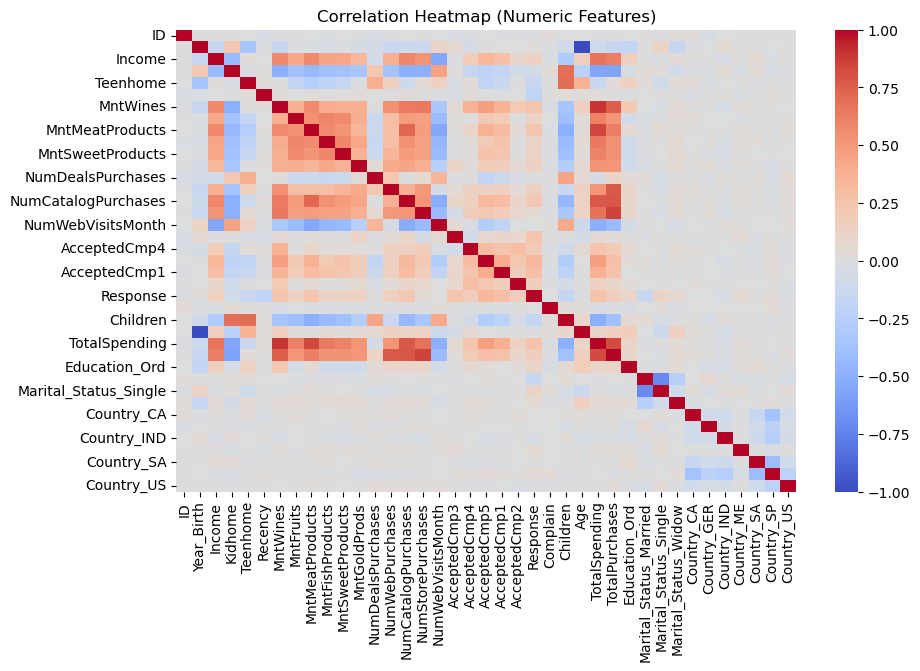

In [69]:
# Step 9: Correlation Heatmap

# Calculate correlation for numeric columns
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


In [70]:
# Step 10: Hypothesis tests
# channel shares
tot = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
web_share   = np.where(tot > 0, df['NumWebPurchases']   / tot, 0.0)
store_share = np.where(tot > 0, df['NumStorePurchases'] / tot, 0.0)

# H1: store_share across age groups (ANOVA)
age_grp = pd.cut(df['Age'], [0, 40, 60, 120], labels=['Young','Middle','Senior'], right=False)
g = [pd.Series(store_share)[age_grp == lab].dropna() for lab in ['Young','Middle','Senior']]
print("H1 (F, p) =", stats.f_oneway(*g))

# H2: web_share for Children>0 vs ==0 (Welch t-test)
print("H2 (t, p) =", stats.ttest_ind(pd.Series(web_share)[df['Children'] > 0],
                                     pd.Series(web_share)[df['Children'] == 0],
                                     equal_var=False))

# H3: online vs store purchases (Pearson r, p)
online = df['NumWebPurchases'] + df['NumCatalogPurchases']
print("H3 (r, p)  =", stats.pearsonr(online, df['NumStorePurchases']))

# H4: USA vs Rest on TotalPurchases (Welch t-test)
if 'Country' in df.columns:
    us_mask = df['Country'].astype(str).str.upper().isin(['US', 'USA'])
else:
    dummies = [c for c in df.columns if c.upper().startswith('COUNTRY_')]
    us_col = next((c for c in dummies if c.upper().endswith('_US') or c.upper().endswith('_USA')), None)
    us_mask = (df[us_col] == 1) if us_col else pd.Series(False, index=df.index)

print("H4 (t, p)  =", stats.ttest_ind(df.loc[us_mask, 'TotalPurchases'],
                                      df.loc[~us_mask, 'TotalPurchases'],
                                      equal_var=False, nan_policy='omit'))


H1 (F, p) = F_onewayResult(statistic=9.628365465103103, pvalue=6.86077607570056e-05)
H2 (t, p) = TtestResult(statistic=15.022203927505007, pvalue=6.730145075051134e-47, df=1210.0154320766462)
H3 (r, p)  = PearsonRResult(statistic=0.6153592978630151, pvalue=1.470585604323322e-233)
H4 (t, p)  = TtestResult(statistic=1.4681953545474953, pvalue=0.1446759042957516, df=119.6170334141123)


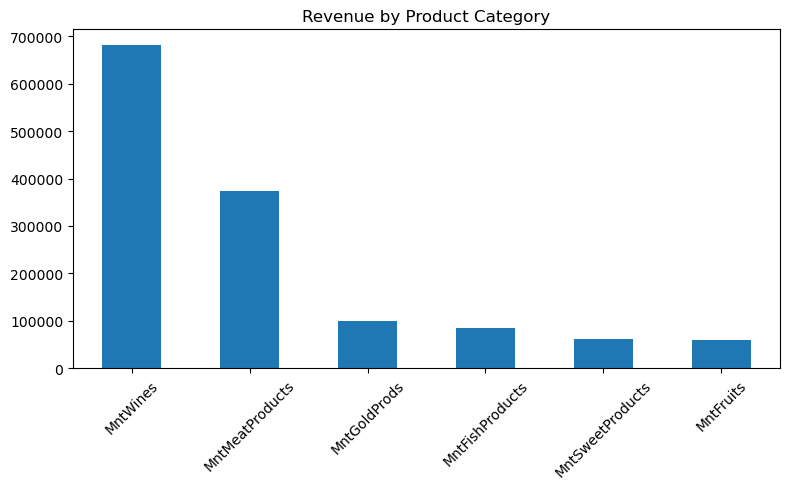

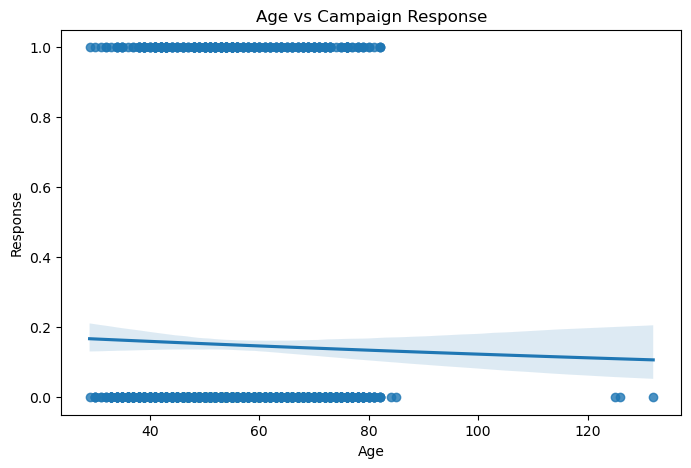

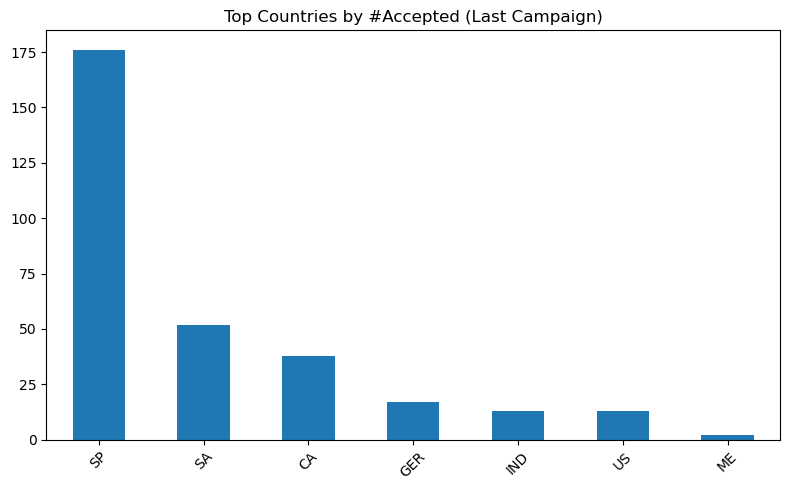

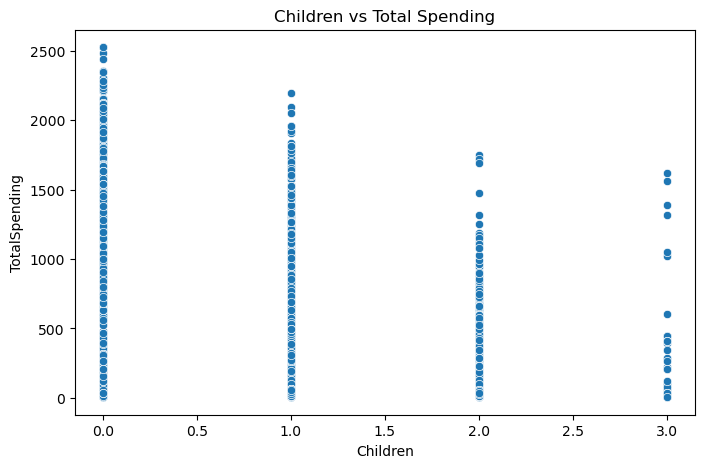

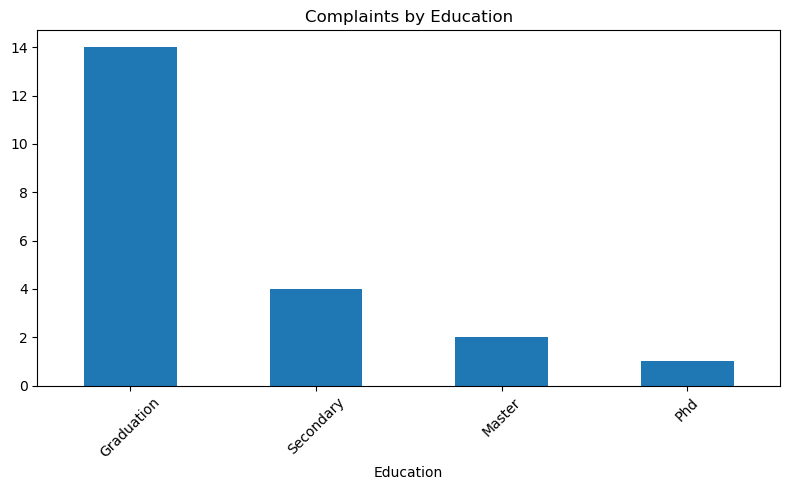

In [71]:
# Step 11: Required visuals

# 11.1 Revenue by product category
mnt_cols = [c for c in df.columns if c.startswith('Mnt')]
df[mnt_cols].sum().sort_values(ascending=False).plot(kind='bar', rot=45, title='Revenue by Product Category')
plt.tight_layout(); plt.show()

# 11.2 Age vs Response
if {'Age','Response'}.issubset(df.columns):
    sns.regplot(x='Age', y='Response', data=df, logistic=True)
    plt.title('Age vs Campaign Response'); plt.show()

# 11.3 Country with most accepted last campaign
if 'Country' in df.columns and 'Response' in df.columns:
    acc = df.groupby('Country')['Response'].sum().sort_values(ascending=False)
else:
    country_cols = [c for c in df.columns if c.startswith('Country_')]
    acc = pd.Series({c.split('_',1)[1]: (df[c]*df['Response']).sum() for c in country_cols}).sort_values(ascending=False)
acc.head(10).plot(kind='bar', rot=45, title='Top Countries by #Accepted (Last Campaign)')
plt.tight_layout(); plt.show()

# 11.4 Children vs TotalSpending
if {'Children','TotalSpending'}.issubset(df.columns):
    sns.scatterplot(x='Children', y='TotalSpending', data=df)
    plt.title('Children vs Total Spending'); plt.show()

# 11.5 Complaints by Education
if {'Complain','Education'}.issubset(df.columns):
    df.loc[df['Complain']==1].groupby('Education').size().sort_values(ascending=False).plot(kind='bar', rot=45, title='Complaints by Education')
    plt.tight_layout(); plt.show()


In [72]:
# Step 12: Save clean dataset
df.to_csv("marketing_data_clean.csv", index=False)
print("Saved:", "marketing_data_clean.csv", "| shape:", df.shape)


Saved: marketing_data_clean.csv | shape: (2240, 41)
